## Import Librairies

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [14]:
csv_file = "/content/AmesHousing.csv"

Ames_Housing = pd.read_csv(csv_file)

In [15]:
Ames_Housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [16]:
Ames_Housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Data Manipulation

In [17]:
x_train = Ames_Housing['Gr Liv Area']
y_train = Ames_Housing['SalePrice']

In [18]:
print("Type of x_train: ", type(x_train))
print("First five elements of x_train :\n", x_train[:5])

Type of x_train:  <class 'pandas.core.series.Series'>
First five elements of x_train :
 0    1656
1     896
2    1329
3    2110
4    1629
Name: Gr Liv Area, dtype: int64


In [19]:
print("Type of y_train: ", type(y_train))
print("First five elements of y_train :\n", y_train[:5])

Type of y_train:  <class 'pandas.core.series.Series'>
First five elements of y_train :
 0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64


In [20]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (2930,)
The shape of y_train is:  (2930,)
Number of training examples (m): 2930


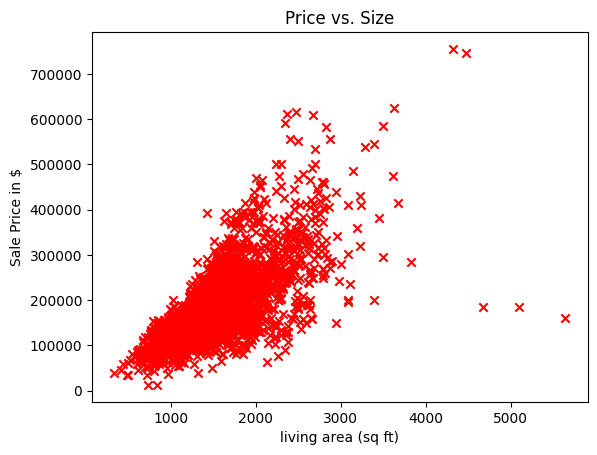

In [21]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Price vs. Size')
plt.ylabel('Sale Price in $')
plt.xlabel('living area (sq ft)')
plt.show()

## x and y Normalization

In [25]:
x_train = x_train.to_frame()
y_train = y_train.to_frame()

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_norm = scaler_x.fit_transform(x_train)
y_train_norm = scaler_y.fit_transform(y_train)


## Model

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


## Training

In [27]:
model.fit(x_train_norm, y_train_norm)

LinearRegression()

In [28]:
new_sq_ft = np.array([[2000]])  # area in sq ft
new_sq_ft_norm = scaler_x.transform(new_sq_ft)
predicted_norm = model.predict(new_sq_ft_norm)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
# Predictions
y_pred_norm = model.predict(x_train_norm)
y_pred = scaler_y.inverse_transform(y_pred_norm)

# Denormalize x_train
x_train_original = scaler_x.inverse_transform(x_train_norm)

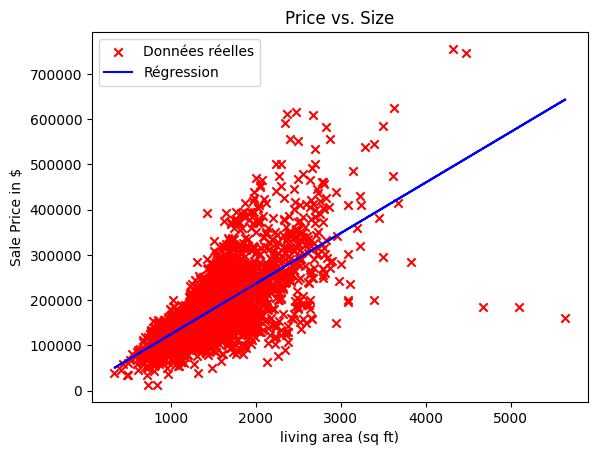

In [31]:
# Visualization
plt.scatter(x_train_original, y_train, marker='x', c='red', label='Données réelles')
plt.plot(x_train_original, y_pred, color='blue', label='Régression')

plt.title('Price vs. Size')
plt.ylabel('Sale Price in $')
plt.xlabel('living area (sq ft)')
plt.legend()
plt.show()